In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
csv_path = r"cancer_reg.csv"

df_cancer = pd.read_csv(csv_path, sep=",")

In [3]:
df_cancer.tail(3)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [4]:
df_cancer.shape

(3047, 33)

In [5]:
df_cancer.columns.to_list()

['avganncount',
 'avgdeathsperyear',
 'target_deathrate',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'binnedinc',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'geography',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctsomecol18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate']

In [6]:
df_cancer.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [8]:
df_cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


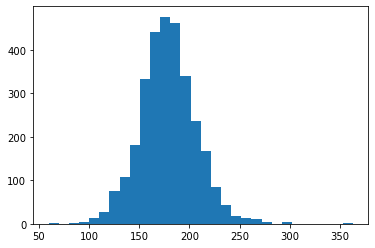

In [19]:
plt.hist(df_cancer['target_deathrate'], bins=30)
plt.show()

array([[<AxesSubplot:title={'center':'target_deathrate'}>]], dtype=object)

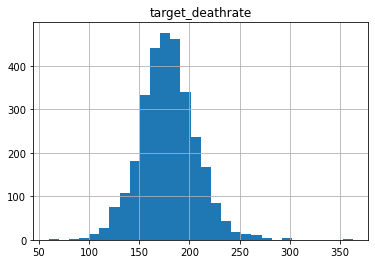

In [25]:
df_cancer.hist(column="target_deathrate", bins=30)

<AxesSubplot:xlabel='target_deathrate', ylabel='Probability'>

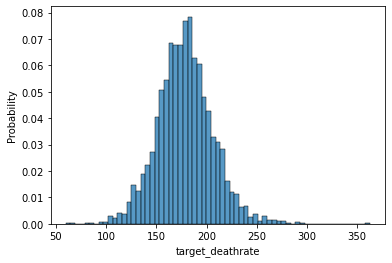

In [26]:
sns.histplot(df_cancer["target_deathrate"], stat='probability')

<AxesSubplot:xlabel='Count', ylabel='target_deathrate'>

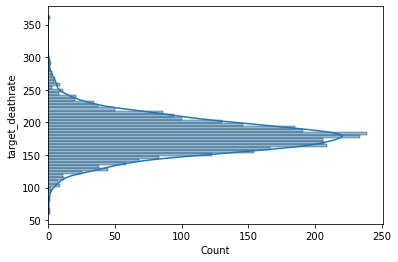

In [17]:
sns.histplot(data=df_cancer, y="target_deathrate", kde=True)

# Tarea que me hacen hacer en clase

Text(0.5, 1.0, 'Probabity distribution of Cancer median age')

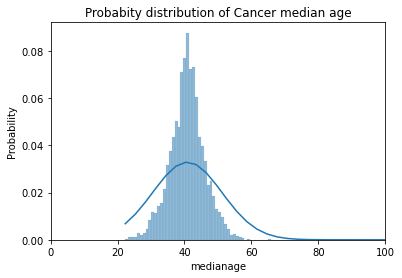

In [35]:
sns.histplot(data=df_cancer, x="medianage", kde=True, stat='probability')
plt.xlim([0, 100])
plt.title('Probabity distribution of Cancer median age')

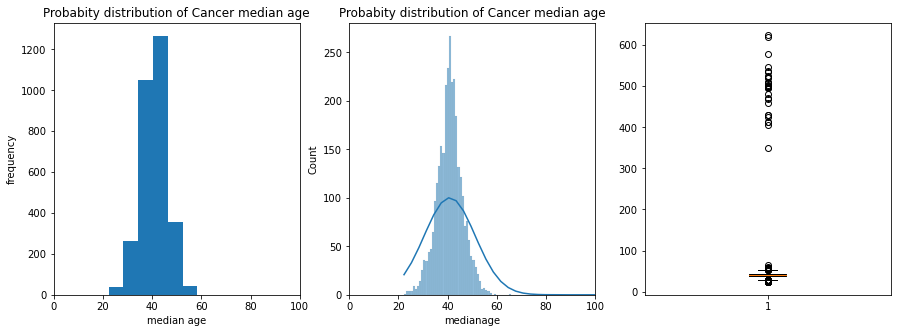

In [52]:
#plt.rcParams["figure.figsize"] = (15,5) 
plt.subplot(1, 3, 1)
plt.hist(df_cancer['medianage'], bins=100)
plt.title('Probabity distribution of Cancer median age')
plt.xlabel('median age')
plt.ylabel('frequency')
plt.xlim([0, 100])

plt.subplot(1, 3, 2)
sns.histplot(data=df_cancer, x="medianage", kde=True)
plt.xlim([0, 100])
plt.title('Probabity distribution of Cancer median age')

plt.subplot(1, 3, 3)
plt.boxplot(df_cancer['medianage'])

plt.show()

In [56]:
df_cancer_age_over_100 = df_cancer[df_cancer['medianage'] > 100]
df_cancer_age_over_100.shape

(30, 33)

In [59]:
df_cancer_age_over_100.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,...,23.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,482.155589,153.800000,180.260000,459.751647,47339.100000,94433.80000,16.453333,35.978869,492.640000,39.800000,...,48.673913,40.326667,35.766667,18.863333,80.814687,10.586537,1.079172,2.120611,50.634530,5.757467
std,600.251960,171.476428,29.619677,49.032586,10819.238533,166746.27932,5.749527,74.441478,60.631218,5.395848,...,11.802936,11.501152,7.776150,5.822103,18.713975,12.968703,2.014968,2.731726,5.864552,2.201884
min,21.000000,4.000000,135.700000,373.200000,32903.000000,1670.00000,6.900000,0.000000,349.200000,28.900000,...,24.700000,18.400000,21.800000,9.000000,21.724323,0.035849,0.000000,0.000000,36.829268,2.939068
25%,86.000000,25.250000,159.300000,419.750000,38167.500000,10485.25000,11.700000,0.000000,461.100000,36.625000,...,39.950000,29.975000,31.150000,15.625000,69.550965,0.867236,0.242135,0.344985,46.905255,4.231536
50%,260.500000,96.500000,178.000000,466.150000,44709.000000,38389.00000,16.450000,0.000000,499.200000,40.250000,...,47.900000,42.700000,36.050000,18.050000,89.364800,2.878586,0.515636,0.908671,50.788839,5.492998
75%,728.750000,249.500000,193.475000,491.700000,56880.000000,123899.75000,19.375000,24.546795,522.300000,41.900000,...,57.650000,49.875000,39.150000,23.125000,95.919282,21.671311,1.192980,2.298499,54.482486,6.522726
max,2732.000000,808.000000,267.600000,555.700000,70705.000000,895823.00000,28.800000,318.674315,624.000000,52.300000,...,67.600000,57.300000,53.800000,32.900000,98.442662,41.733158,11.021677,9.734481,61.336613,12.648456


In [70]:
df_cancer.loc[df_cancer['medianage'] < 100, 'medianage'].describe()

count    3017.000000
mean       40.823865
std         5.196933
min        22.300000
25%        37.700000
50%        40.900000
75%        43.800000
max        65.300000
Name: medianage, dtype: float64

In [73]:
df_cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

<AxesSubplot:xlabel='avgdeathsperyear', ylabel='avganncount'>

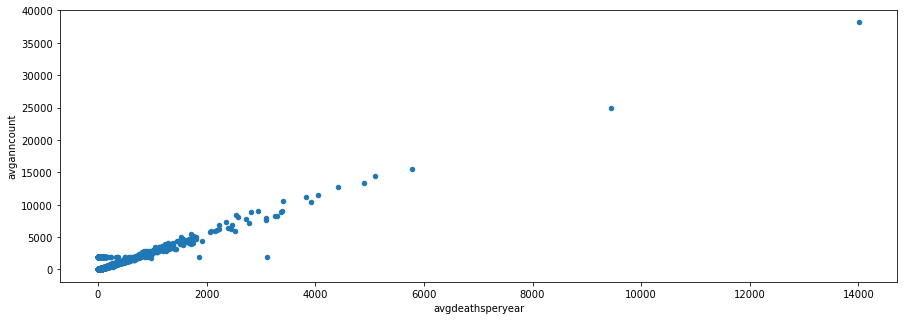

In [75]:
df_cancer.plot.scatter(y='avganncount', x='avgdeathsperyear')

In [79]:
cols_high = ['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate', 'medincome']
df_filter = df_cancer[cols_high]

In [80]:
corr = df_filter.corr()
corr.style.background_gradient(cmap='coolwarm')

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000


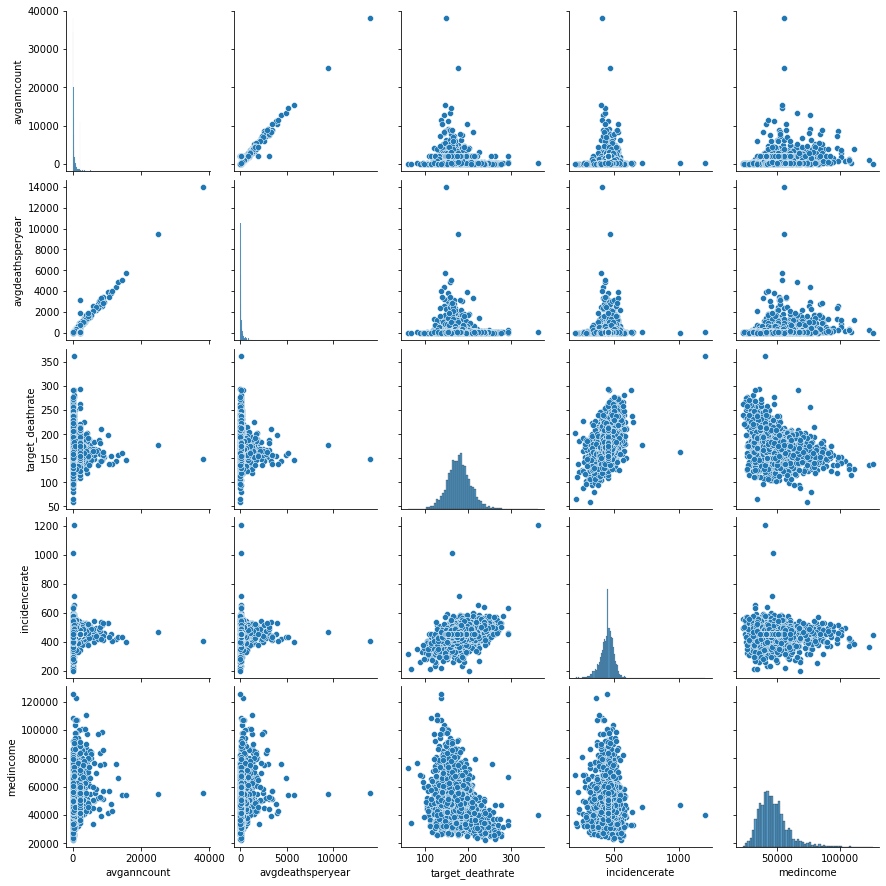

In [82]:
sns.pairplot(df_filter, markers='o')